  **The aim of this notebook is to predict which customers will have their loan approved**




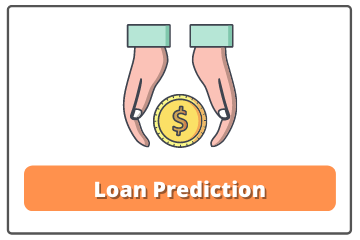

In [319]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings  # warning filter

#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score

#ML models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


warnings.filterwarnings("ignore")

In [320]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [321]:
print(train.shape) 
print(test.shape)

(614, 13)
(367, 12)


data.shape means we have 614 rows and 13 columns

In [322]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


head() used to view first specific rows of data by default it is 5

we can use data.head(10)

In [323]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**describe()** is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values

In [324]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


 **info()** used to print a summary of a DataFrame. This prints index dtype and column dtypes, non-null values and memory usage.

# Preprocessing

   ---- In our data, We have 2 columns ApplicantIncome & CoapplicantIncome we can add them and name as **TotalIncome** 

In [505]:
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['TotalIncome'] = test['ApplicantIncome'] + test['CoapplicantIncome']

KeyError: ignored

We will drop the previous 2 columns that is  ApplicantIncome &  CoapplicantIncom for permanent thats why used inplace=True

In [506]:
train.drop(['ApplicantIncome','CoapplicantIncome'],inplace=True,axis=1)
test.drop(['ApplicantIncome','CoapplicantIncome'],inplace=True,axis=1)

KeyError: ignored

In [ ]:
train.info()

In [ ]:
train.head()

There is no need of Loan_ID, It will confuse our model se we will drop it

In [ ]:
train.drop('Loan_ID',inplace=True,axis=1)
test.drop('Loan_ID',inplace=True,axis=1)

In [ ]:
train.head()

**Handling Missing Values**

In [ ]:
# isna() & isnull() Both are same don't get confuse

train.isnull().sum() # or train.isna().sum()

In [ ]:
# Used sort_values() for just ascending purpose 
train.isnull().sum().sort_values(ascending=False)

**Dealing with null Values**

For Categorical Variable & for binary varibale we use mode() , which replace most frequent value in that columns we use [0] for to get just most frequnt value 

In [ ]:

# Dealing with training data

train.fillna({
    'Credit_History': train.Credit_History.mode()[0],
    'Self_Employed': train.Dependents.mode()[0],
    'LoanAmount': train.LoanAmount.median(),
    'Dependents': train.Dependents.mode()[0],
    'Loan_Amount_Term': train.Loan_Amount_Term.mode()[0],
    'Gender': train.Gender.mode()[0],
    'Married': train.Married.mode()[0]
}, inplace=True)

In [ ]:

# Dealing with testing data

test.fillna({
    'Credit_History': test.Credit_History.mode()[0],
    'Self_Employed': test.Dependents.mode()[0],
    'LoanAmount': test.LoanAmount.median(),
    'Dependents': test.Dependents.mode()[0],
    'Loan_Amount_Term': test.Loan_Amount_Term.mode()[0],
    'Gender': test.Gender.mode()[0],
    'Married': test.Married.mode()[0]
}, inplace=True)

In [ ]:
# isna() & isnull() Both are same don't get confuse

train.isnull().sum() # or train.isna().sum()

# Data Visvualization(EDA)

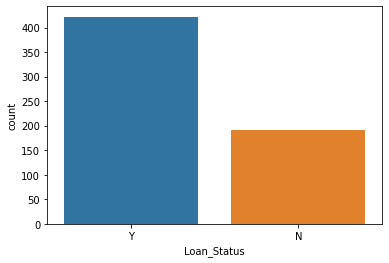

In [335]:
# Visualizing how  many yes and no present in data


sns.countplot(train['Loan_Status']) # or sns.countplot('Loan_Status',data=train)

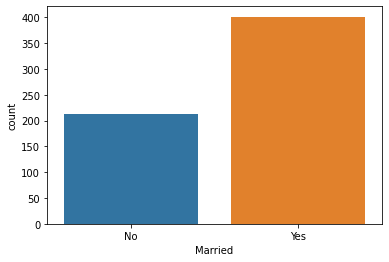

In [336]:

# Visualizing how many are married one in data

sns.countplot(train['Married'])

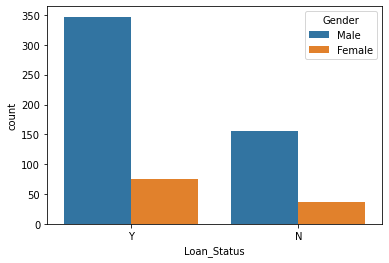

In [337]:

# Visualizing how many people get loan who are Male & Female in data

sns.countplot('Loan_Status',data=train,hue='Gender')

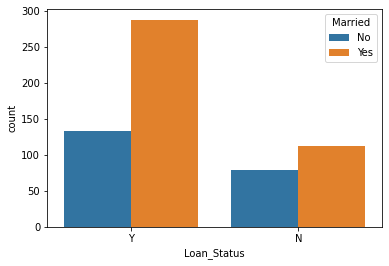

In [338]:

# Visualizing how many people get loan who are married in data

sns.countplot('Loan_Status',data=train,hue='Married')

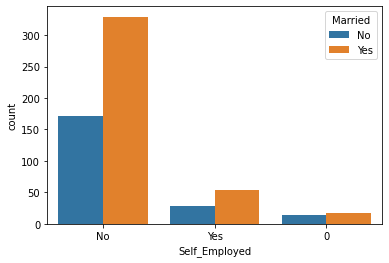

In [339]:
# Visualizing how many people get loan who are married in data

sns.countplot('Self_Employed',data=train,hue='Married')

In [ ]:
# we have 0 value in the categorical variable[Self_Employed] we will replace 0 by 'No'

train['Self_Employed'].replace('0','No',inplace=True)

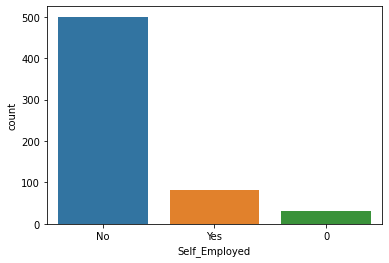

In [340]:

# Now again visualize after replacing 0 with No

# Visualizing how many people get loan who are married in data

sns.countplot('Self_Employed',data=train)

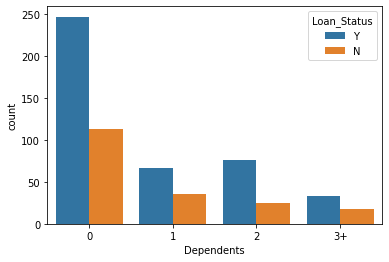

In [341]:

# Visualizing how many people get loan on the basis of depenecies(Family memeber) in data

sns.countplot('Dependents',data=train,hue='Loan_Status')

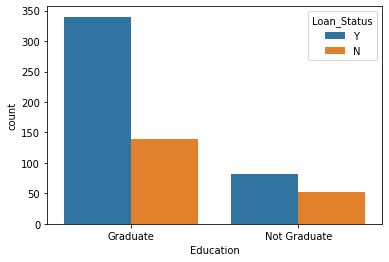

In [342]:
# Visualizing how many people get loan on the basis of their Education in data

sns.countplot('Education',data=train,hue='Loan_Status')

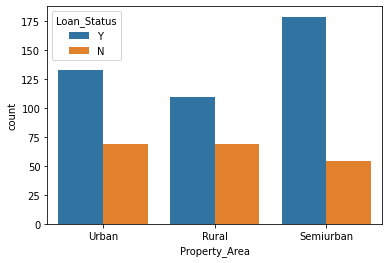

In [343]:
# Visualizing how many people get loan on the basis of their Living Area in data

sns.countplot('Property_Area',data=train,hue='Loan_Status')

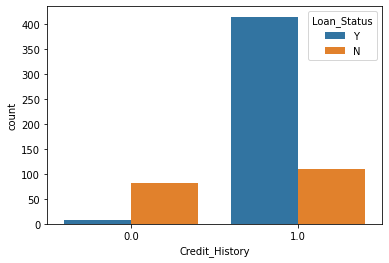

In [344]:
# plotting data on the basis of Credit_History
sns.countplot('Credit_History',data=train,hue='Loan_Status')

In [345]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'TotalIncome'],
      dtype='object')

In [346]:
train.head(20)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,128.0,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0
5,Male,Yes,2,Graduate,Yes,267.0,360.0,1.0,Urban,Y,9613.0
6,Male,Yes,0,Not Graduate,No,95.0,360.0,1.0,Urban,Y,3849.0
7,Male,Yes,3+,Graduate,No,158.0,360.0,0.0,Semiurban,N,5540.0
8,Male,Yes,2,Graduate,No,168.0,360.0,1.0,Urban,Y,5532.0
9,Male,Yes,1,Graduate,No,349.0,360.0,1.0,Semiurban,N,23809.0


**Encoding Categorical Data**

In [347]:
from sklearn.preprocessing import LabelEncoder


# Encoding Gender

gender_le = LabelEncoder()
train['Gender'] = gender_le.fit_transform(train['Gender'])

# Encoding Married

married_le = LabelEncoder()
train['Married'] = married_le.fit_transform(train['Married'])



In [266]:
train['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

The Dependents colums having 4 value that is 0,1,2,3+
we we replace 3+ with 3



In [348]:
train['Dependents'].replace('3+','3',inplace=True)

In [349]:
train['Dependents'].unique()

array(['0', '1', '2', '3'], dtype=object)

Here in **Dependents** column we have more then 2 unique value so we are going to encode it using OneHotEncoding to avoid dependecies problem which will may occur by LabelEncoder

In [350]:

# Encoding Dependents

from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [3])],remainder='passthrough') 
X=np.array(columnTransformer.fit_transform(train),dtype=np.str)


In [351]:

# Encoding Education

education_le = LabelEncoder()
train['Education'] = education_le.fit_transform(train['Education'])


In [352]:

# Encoding Self_Employed

self_employed_le = LabelEncoder()
train['Self_Employed'] = self_employed_le.fit_transform(train['Self_Employed'])


In [353]:

# Encoding Property_Area

property_area_le = LabelEncoder()
train['Property_Area'] = property_area_le.fit_transform(train['Property_Area'])


In [354]:

# Encoding Loan_Status	

loan_status_le = LabelEncoder()
train['Loan_Status'] = loan_status_le.fit_transform(train['Loan_Status'])


In [423]:
train['Credit_History'].unique()

array([1., 0.])

# **Model Development**

In [473]:
X = train.drop('Loan_Status',axis=1)
y = train['Loan_Status']

In [474]:
train

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,0,1,128.0,360.0,1.0,2,1,5849.0
1,1,1,1,0,1,128.0,360.0,1.0,0,0,6091.0
2,1,1,0,0,2,66.0,360.0,1.0,2,1,3000.0
3,1,1,0,1,1,120.0,360.0,1.0,2,1,4941.0
4,1,0,0,0,1,141.0,360.0,1.0,2,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,1,71.0,360.0,1.0,0,1,2900.0
610,1,1,3,0,1,40.0,180.0,1.0,0,1,4106.0
611,1,1,1,0,1,253.0,360.0,1.0,2,1,8312.0
612,1,1,2,0,1,187.0,360.0,1.0,2,1,7583.0


**Spliting the dataset**

In [475]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [479]:

# Logistics Regression Implementation

LR = LogisticRegression()
LR.fit(X_train, y_train)
y_predict_lr = LR.predict(X_test)

print('Training Accuracy : ', LR.score(X_train, y_train))
print('Test Accuracy : ', accuracy_score(y_test,y_predict_lr)) 

Training Accuracy :  0.8085539714867617
Test Accuracy :  0.8048780487804879


In [504]:

# Decision tree Implementation

DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
y_pred_dtc = DTC.predict(X_test)

print('Training Accuracy : ', DTC.score(X_train, y_train))
print('Test Accuracy : ', accuracy_score(y_test,y_pred_dtc)) 

Training Accuracy :  1.0
Test Accuracy :  0.7398373983739838


In [480]:

# Random Forest Implementation


rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

print('Train set score : ', rfc.score(X_train, y_train))
print('Test set score : ', accuracy_score(y_test,y_pred_rfc))

Train set score :  1.0
Test set score :  0.7479674796747967


In [500]:

# Naive Bayes Implementation

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print('Train set score : ', gnb.score(X_train, y_train))
print('Test set score : ', accuracy_score(y_test,y_pred1))

Train set score :  0.8105906313645621
Test set score :  0.7967479674796748


# Conclusion 

Logistics Regression Algoritham is the best algorithm among all with **80%** Accuracy.